In [18]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
#Please comment out this line of code if unnecessary
#uploaded = files.upload()

EDA

In [19]:
data_xls = pd.read_excel('Credit Card Customer Data.xlsx', index_col=None)
data_xls.to_csv('csvfile.csv', encoding='utf-8', index=False)
Data = pd.read_csv("csvfile.csv")
Data.head(10) #several missing values!

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [20]:
#checking types of data to see what invalid data I need to analyze for
Data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [21]:
#how many rows and columns
Data.shape

(660, 7)

In [22]:
#general info about data
Data.info

<bound method DataFrame.info of      Sl_No  Customer Key  ...  Total_visits_online  Total_calls_made
0        1         87073  ...                    1                 0
1        2         38414  ...                   10                 9
2        3         17341  ...                    3                 4
3        4         40496  ...                    1                 4
4        5         47437  ...                   12                 3
..     ...           ...  ...                  ...               ...
655    656         51108  ...                   10                 0
656    657         60732  ...                   13                 2
657    658         53834  ...                    9                 1
658    659         80655  ...                   15                 0
659    660         80150  ...                   12                 2

[660 rows x 7 columns]>

In [23]:
#describe data. Based on analysis, it makes sense to not analyze S1_No univariately as it is an index value. Analyzed all other columns.
Data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


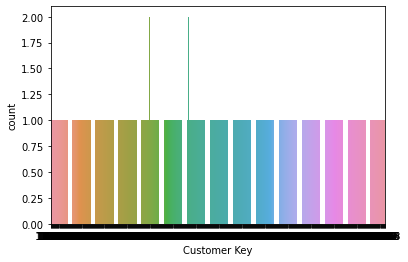

In [24]:
#Univariate analysis of Customer Key. Used countplot and found one value of each key.
sns.countplot(Data["Customer Key"])

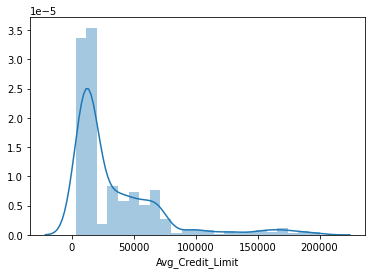

In [34]:
#Univariate analysis with distplot of average credit limits as there are various credit limits.
sns.distplot(Data["Avg_Credit_Limit"])

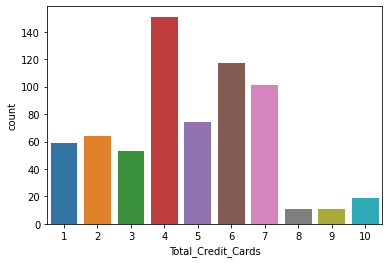

In [26]:
#countplot for total credit cards
sns.countplot(Data["Total_Credit_Cards"])

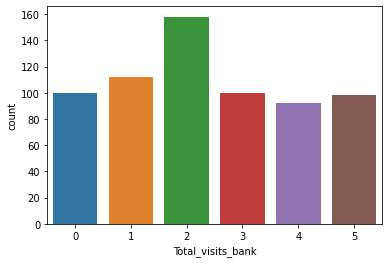

In [27]:
#count plot for bank visits
sns.countplot(Data["Total_visits_bank"])

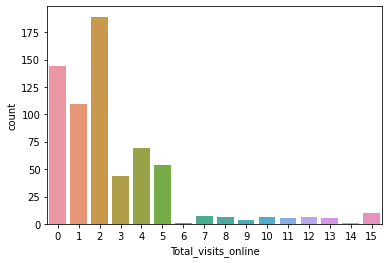

In [28]:
#count plot for visits online
sns.countplot(Data["Total_visits_online"])

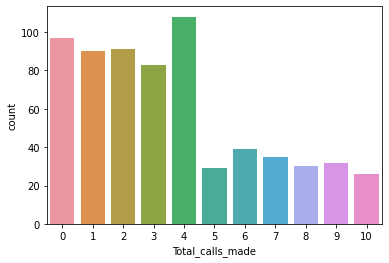

In [29]:
#count plot for calls madee
sns.countplot(Data["Total_calls_made"])

In [30]:
#Correlated data with kendall method
Data.corr(method='kendall')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.000000,0.035219,0.511875,0.555316,0.301461,-0.261829,-0.483440
Customer Key,0.035219,1.000000,0.048772,-0.005471,-0.002259,0.005778,-0.000494
Avg_Credit_Limit,0.511875,0.048772,1.000000,0.393034,0.082167,-0.078739,-0.326996
Total_Credit_Cards,0.555316,-0.005471,0.393034,1.000000,0.296640,-0.242907,-0.492532
Total_visits_bank,0.301461,-0.002259,0.082167,0.296640,1.000000,-0.512982,-0.373968
Total_visits_online,-0.261829,0.005778,-0.078739,-0.242907,-0.512982,1.000000,0.310855
Total_calls_made,-0.483440,-0.000494,-0.326996,-0.492532,-0.373968,0.310855,1.000000


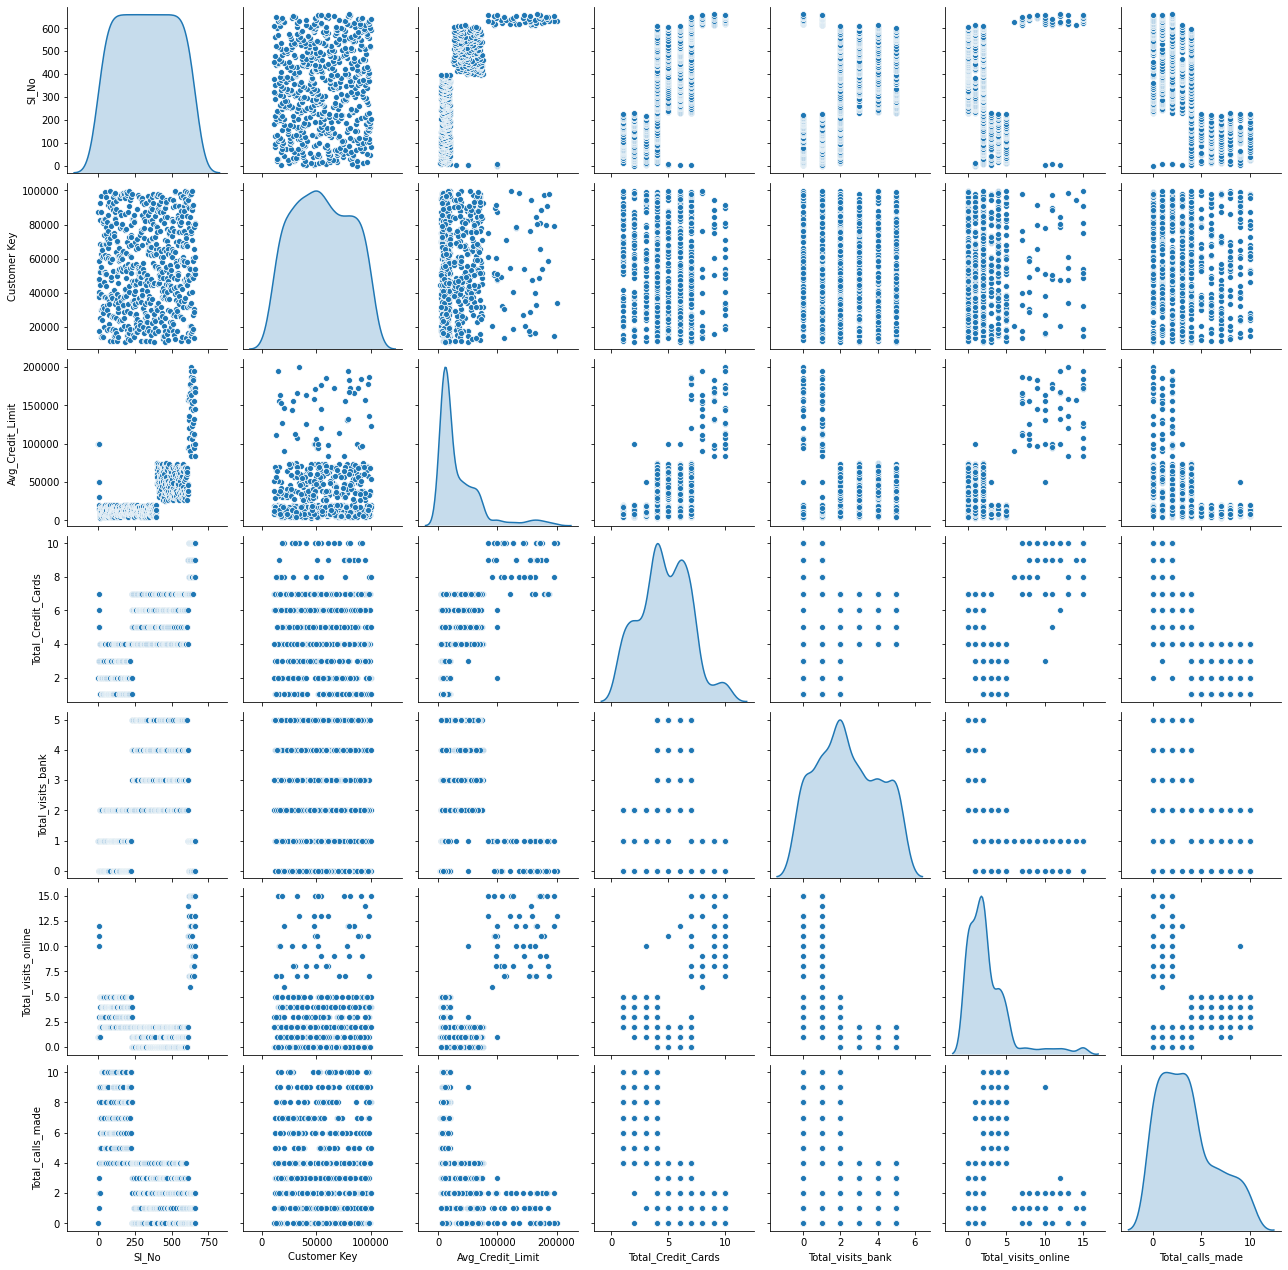

In [32]:
#plotted all data values
sns.pairplot(Data,diag_kind='kde')

Observations:


* From diagonal plots we can see origin has 4 points (evident from data)
* total_calls_made, total_visits_online, total_visits_bank, total_credit_cards, avg_credit_limits - shows four peaks majorily
* customer key and si_no is normal
* total_visits_bank is 6 clusters
* from bivariate plots we can see that Total_visits_online has negative linear relationship with Sl_No, Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank	
* (correlation too gives high negative correlation)
* Total_calls_made too shows negative correlation with levels

In [37]:
#Groups by total visits online
Data.groupby(Data["Total_visits_online"]).mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_calls_made
Total_visits_online,,,,,,
0,422.090278,55958.270833,35131.944444,5.534722,3.506944,2.069444
1,412.256881,51327.862385,34091.743119,5.422018,3.229358,2.009174
2,327.449735,56814.100529,25523.809524,4.582011,2.867725,3.296296
3,135.045455,55843.022727,13272.727273,2.590909,0.977273,6.931818
4,115.478261,56169.376812,12739.130435,2.536232,0.898551,6.913043
5,112.018519,51780.148148,12129.629630,2.277778,0.962963,7.037037
6,626.000000,20337.000000,91000.000000,8.000000,1.000000,1.000000
7,632.285714,49795.428571,149857.142857,8.428571,0.714286,0.857143
8,644.333333,44564.500000,130666.666667,8.666667,0.500000,0.833333


In [39]:
#Dropped S1_No and Customer Key as these can be used to index data and identify the data but are not relevant for the data analysis
Data_new = Data.drop(['Sl_No','Customer Key'], axis =1)
Data_new.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [40]:
#Correlated cleaned data with kendall method
Data_new.corr(method='kendall')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.393034,0.082167,-0.078739,-0.326996
Total_Credit_Cards,0.393034,1.000000,0.296640,-0.242907,-0.492532
Total_visits_bank,0.082167,0.296640,1.000000,-0.512982,-0.373968
Total_visits_online,-0.078739,-0.242907,-0.512982,1.000000,0.310855
Total_calls_made,-0.326996,-0.492532,-0.373968,0.310855,1.000000


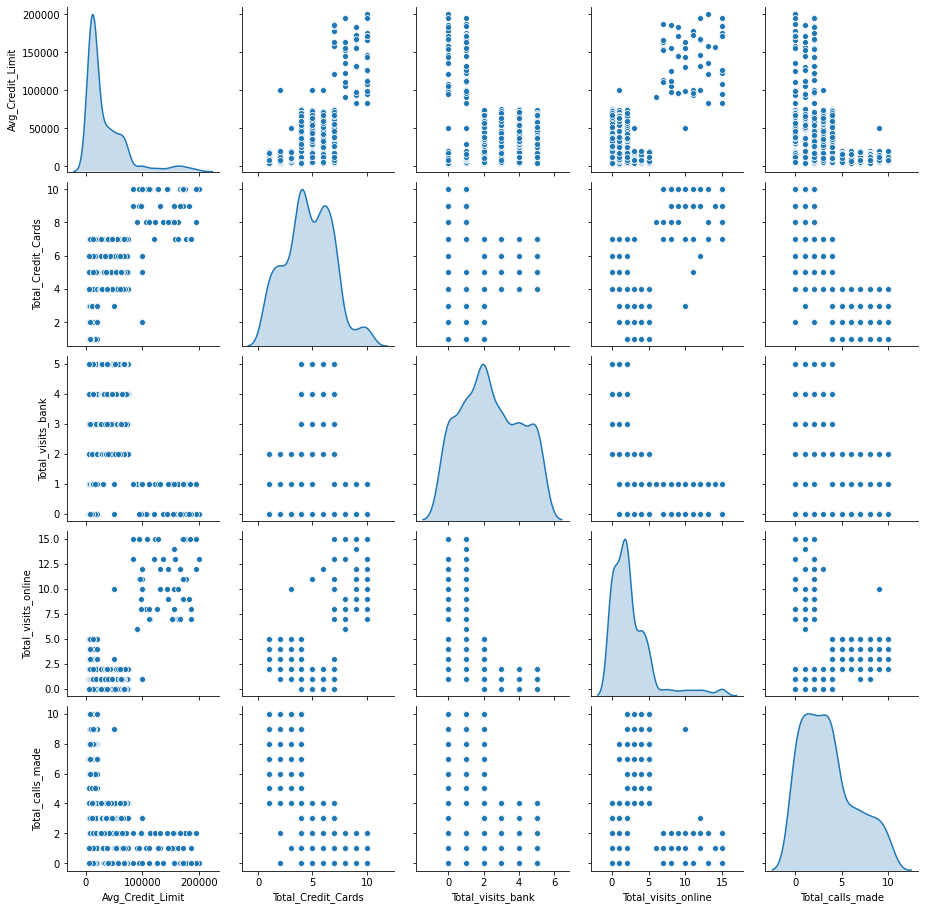

In [42]:
#plotted all cleaned data values
sns.pairplot(Data_new,diag_kind='kde')

Observations:


* From diagonal plots we can see origin has 4 points (evident from data)
* total_calls_made, total_visits_online, total_visits_bank, total_credit_cards, avg_credit_limits - shows four peaks majorily
* total_visits_bank is 6 clusters
* from bivariate plots we can see that Total_visits_online has negative linear relationship with Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank	
* (correlation too gives high negative correlation)
* Total_calls_made too shows negative correlation with levels

In [43]:
#Groups by total visits online
Data_new.groupby(Data_new["Total_visits_online"]).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_calls_made
Total_visits_online,,,,
0,35131.944444,5.534722,3.506944,2.069444
1,34091.743119,5.422018,3.229358,2.009174
2,25523.809524,4.582011,2.867725,3.296296
3,13272.727273,2.590909,0.977273,6.931818
4,12739.130435,2.536232,0.898551,6.913043
5,12129.629630,2.277778,0.962963,7.037037
6,91000.000000,8.000000,1.000000,1.000000
7,149857.142857,8.428571,0.714286,0.857143
8,130666.666667,8.666667,0.500000,0.833333
